In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [133]:
data.shape

(891, 15)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [135]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Number of numeric column

In [136]:
count = 0
print(data.select_dtypes(include=['number']).columns)
for i in data.select_dtypes(include=['number']).columns:
    count +=1
print(f"Number of numerical columns: {count}")

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
Number of numerical columns: 6


In [137]:
data.select_dtypes(include=['number']).shape[1]

6

In [138]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [139]:
data['deck'] = data['deck'].astype(str)

In [140]:
data['deck'].unique()
data['deck'].replace('nan','Z',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\4035086091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['deck'].replace('nan','Z',inplace=True)


In [141]:
data['deck'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

<Axes: xlabel='survived', ylabel='deck'>

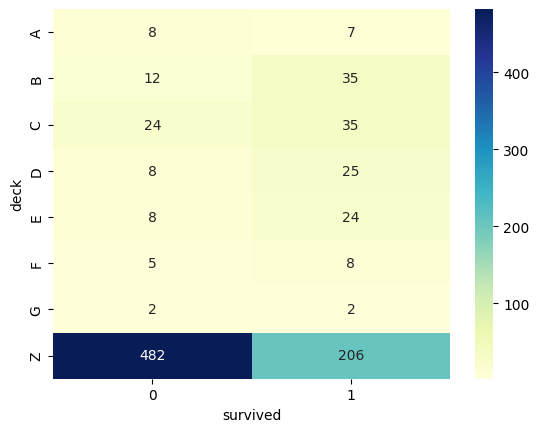

In [142]:
sns.heatmap(pd.crosstab(data['deck'],data['survived']),annot=True,fmt='d',cmap='YlGnBu')

<Axes: xlabel='age', ylabel='Count'>

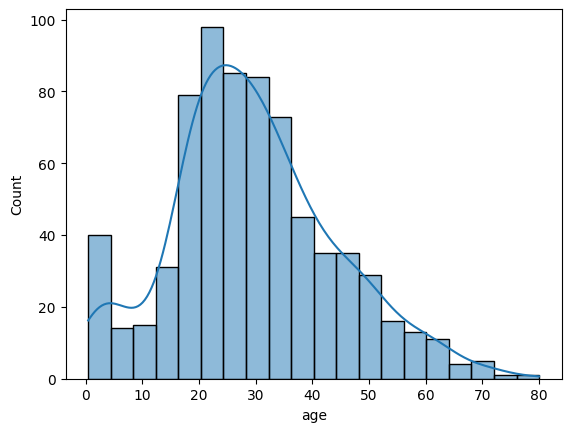

In [143]:
data['age'].isnull().sum()
sns.histplot(data['age'],kde=True)

In [144]:
data['age'].fillna(data['age'].mode().iloc[0],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\3407874782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mode().iloc[0],inplace=True)


<Axes: xlabel='age', ylabel='Count'>

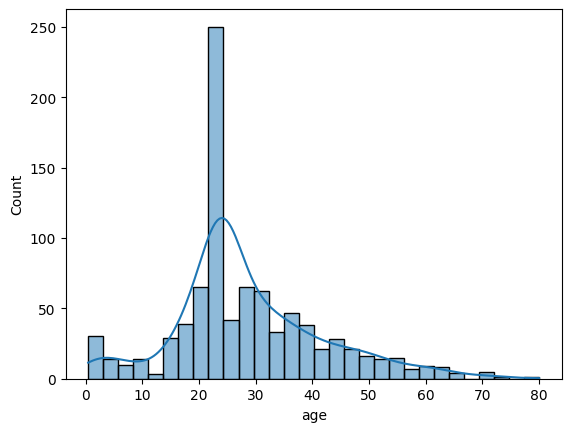

In [145]:
sns.histplot(data['age'],kde=True)

In [146]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [147]:
data.dropna(subset=['embark_town','embarked'],inplace=True)

In [148]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         889 non-null    object  
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(6)
memory usage: 93.0+ KB


In [150]:
data['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [151]:
data['class'] = data['class'].astype(str)
data['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

<Axes: ylabel='age'>

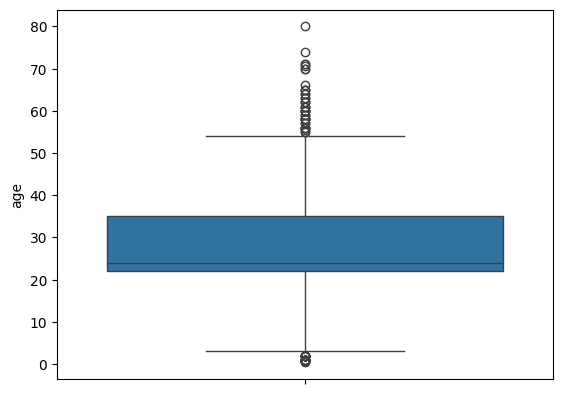

In [152]:
sns.boxplot(data['age'])

In [153]:
data['age'].quantile([0,.25,.50,.75,1.0])

0.00     0.42
0.25    22.00
0.50    24.00
0.75    35.00
1.00    80.00
Name: age, dtype: float64

In [154]:
IQR = 38.000-20.125
IQR

17.875

In [155]:
lower_fence = 20.125 - (1.5 * IQR)
higher_fence = 38.000 + (1.5 * IQR)
lower_fence , higher_fence

(-6.6875, 64.8125)

Datatype : float64
Null values : 0
Decribing Fare :
count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
Fequency Distribution :
Axes(0.125,0.11;0.775x0.77)
Skewness Level : 4.801440211044194


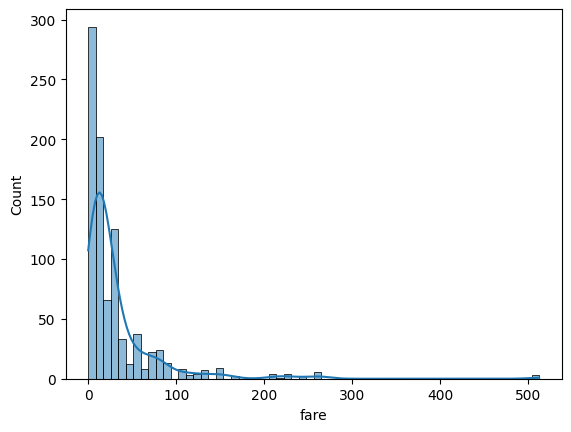

In [156]:
#Finding datatype
print(f"Datatype : {data['fare'].dtype}")
# checking for number of null values
print(f"Null values : {data['fare'].isnull().sum()}")
# Max fare
print(f"Decribing Fare :\n{data['fare'].describe()}")
# Frequency Distribution
print(f"Fequency Distribution :\n{sns.histplot(data['fare'],kde =True)}") # Conclusion left skewed
# skewness level
print(f"Skewness Level : {data['fare'].skew()}")

Highly skewed data 

<Axes: ylabel='fare'>

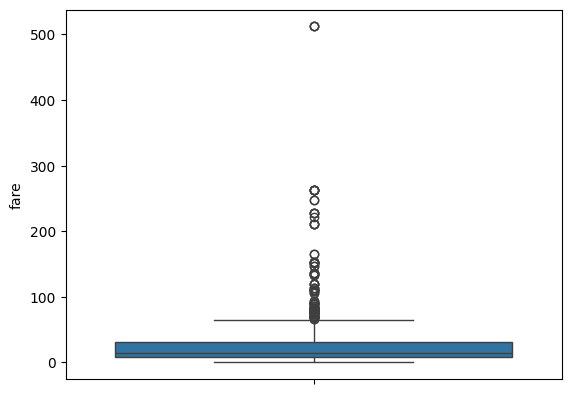

In [157]:
sns.boxplot(data['fare'])

In [158]:
data['fare'].quantile([0.0,.25, .5, .75,1.0])

0.00      0.0000
0.25      7.8958
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: fare, dtype: float64

In [159]:
IQR = 31.0000 - 7.9104
lower_bound = 7.9104 - (1.5 * IQR)
higher_bound = 31.0000 + (1.5 * IQR)
print(f"lower_bound: {lower_bound}\nhigher_bound: {higher_bound}")

lower_bound: -26.724
higher_bound: 65.6344


<Axes: ylabel='fare'>

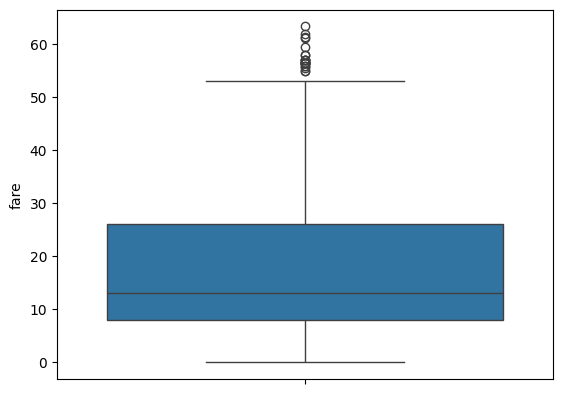

In [160]:
sns.boxplot(data[data['fare']<65]['fare'])

Fequency Distribution :
Axes(0.125,0.11;0.775x0.77)


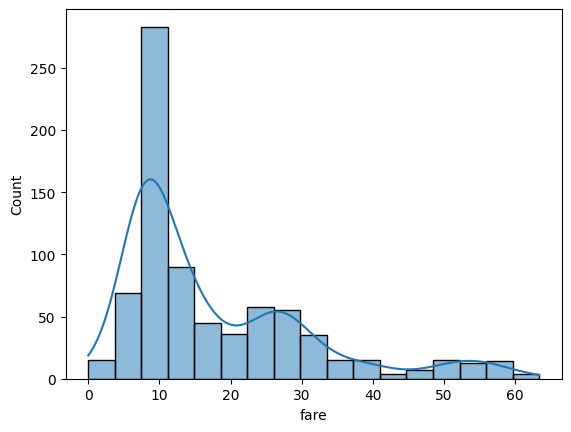

In [161]:
print(f"Fequency Distribution :\n{sns.histplot(data[data['fare']<65]['fare'],kde =True)}")

In [162]:
data['embark_town'].isnull().sum()

np.int64(0)

<Axes: xlabel='embark_town', ylabel='Count'>

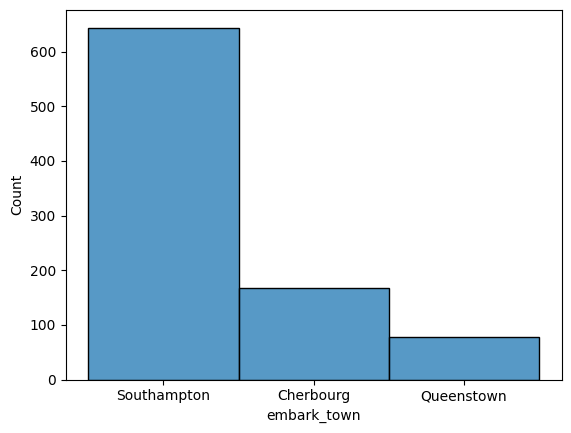

In [163]:
sns.histplot(data['embark_town'])

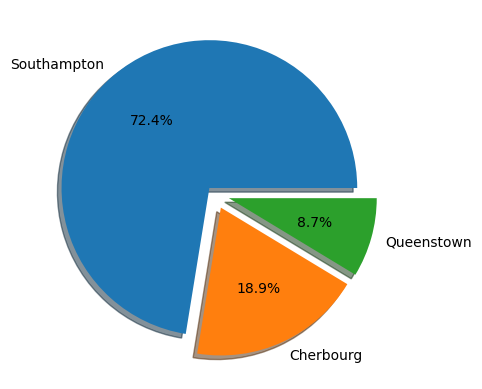

In [164]:
plt.pie(data['embark_town'].value_counts(),autopct='%1.1f%%',labels=data['embark_town'].value_counts().index,shadow=True,explode=[0.055,0.1,0.1],startangle=0)
plt.show()

In [165]:
data['survived'].value_counts()

survived
0    549
1    340
Name: count, dtype: int64

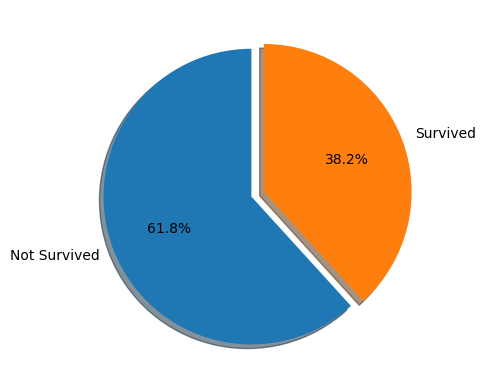

In [166]:
plt.pie(data['survived'].value_counts(),autopct='%1.1f%%',labels=['Not Survived','Survived'],shadow=True,explode=[0.045,0.045],startangle=90)
plt.show()

1. SEQUENCE TO SEQUENCE
2. SEQUENCE TO CATEGORICAL
3. CATEGORICAL TO CATEGORICAL

In [167]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Z,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Z,Southampton,yes,True


In [168]:
# Check for relation between two columns
pd.crosstab(data['survived'], data['pclass'],normalize=True)*100

pclass,1,2,3
survived,,,
0,8.998875,10.911136,41.844769
1,15.073116,9.786277,13.385827


<Axes: xlabel='pclass', ylabel='survived'>

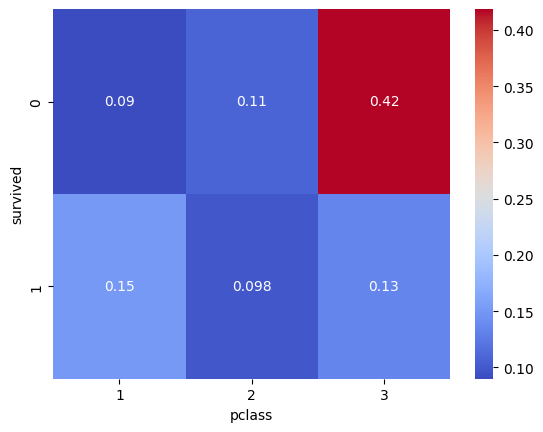

In [169]:
sns.heatmap(pd.crosstab(data['survived'], data['pclass'],normalize=True),cmap= 'coolwarm',annot=True)

In [170]:
pd.crosstab(data['survived'],data['sex'],normalize=True)


sex,female,male
survived,,
0,0.091114,0.526434
1,0.259843,0.122610


<Axes: xlabel='sex', ylabel='survived'>

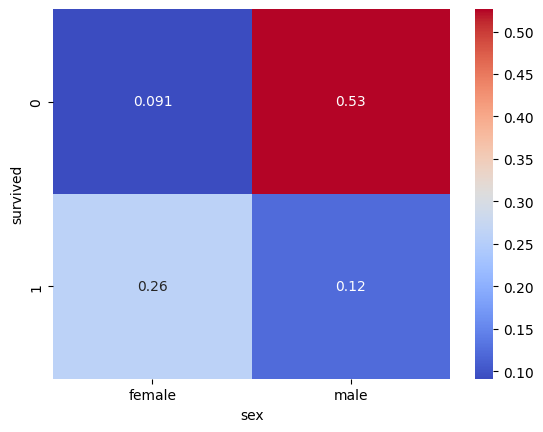

In [171]:
sns.heatmap(pd.crosstab(data['survived'],data['sex'],normalize=True),cmap= 'coolwarm',annot=True)

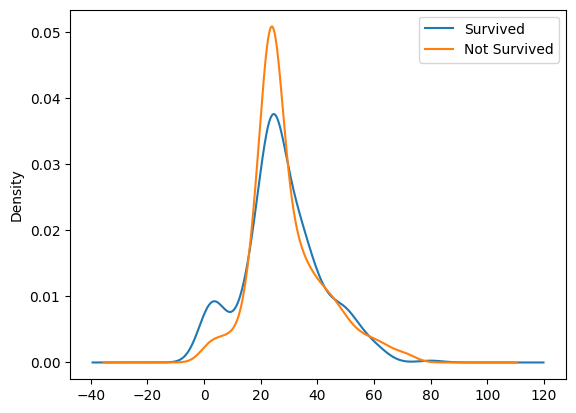

In [172]:
data[data['survived'] ==1]['age'].plot(kind= 'kde',label = 'Survived')
data[data['survived'] ==0]['age'].plot(kind= 'kde',label = 'Not Survived')
plt.legend()
plt.show()

In [173]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Z,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Z,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Z,Southampton,no,True


In [174]:
data['sex'].replace({'male':0,"female":1},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\3731133246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].replace({'male':0,"female":1},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\3731133246.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'].replac

In [175]:
data.drop(columns =['alive'],inplace=True)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    int64  
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 92.0+ KB


In [177]:
data['alone'].replace({True:1,False:0},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\3283173539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['alone'].replace({True:1,False:0},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\3283173539.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['alone'].replace

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    int64  
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alone        889 non-null    int64  
dtypes: bool(1), float64(2), int64(6), object(5)
memory usage: 98.1+ KB


In [179]:
object_cols = data.select_dtypes(include=['object','string']).columns
object_cols

Index(['embarked', 'class', 'who', 'deck', 'embark_town'], dtype='object')

In [180]:
from sklearn.preprocessing import OneHotEncoder
Ohe = OneHotEncoder(drop='first')
Ohe_data = pd.DataFrame(Ohe.fit_transform(data[object_cols]).toarray(),columns=Ohe.get_feature_names_out(object_cols))
Ohe_data.head()

,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Z,embark_town_Queenstown,embark_town_Southampton
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [181]:
data = pd.concat([data,Ohe_data],axis=1).drop(columns=object_cols)
data

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Z,embark_town_Queenstown,embark_town_Southampton
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,True,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,False,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,False,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,False,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,True,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0.0,3.0,1.0,24.0,1.0,2.0,23.4500,False,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
889,1.0,1.0,0.0,26.0,0.0,0.0,30.0000,True,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
890,0.0,3.0,0.0,32.0,0.0,0.0,7.7500,True,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 829
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 889 non-null    float64
 1   pclass                   889 non-null    float64
 2   sex                      889 non-null    float64
 3   age                      889 non-null    float64
 4   sibsp                    889 non-null    float64
 5   parch                    889 non-null    float64
 6   fare                     889 non-null    float64
 7   adult_male               889 non-null    object 
 8   alone                    889 non-null    float64
 9   embarked_Q               889 non-null    float64
 10  embarked_S               889 non-null    float64
 11  class_Second             889 non-null    float64
 12  class_Third              889 non-null    float64
 13  who_man                  889 non-null    float64
 14  who_woman                889 no

In [183]:
data['adult_male'].unique()

array([True, False, nan], dtype=object)

In [184]:
data['adult_male'].replace({True:1,False:0},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\2551621319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['adult_male'].replace({True:1,False:0},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\2551621319.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['adult_male

In [198]:
data.isnull().sum()

survived                   2
pclass                     2
sex                        2
age                        2
sibsp                      2
parch                      2
fare                       2
adult_male                 2
alone                      2
embarked_Q                 2
embarked_S                 2
class_Second               2
class_Third                2
who_man                    2
who_woman                  2
deck_B                     2
deck_C                     2
deck_D                     2
deck_E                     2
deck_F                     2
deck_G                     2
deck_Z                     2
embark_town_Queenstown     2
embark_town_Southampton    2
dtype: int64

In [199]:
data.dropna(inplace=True)

In [201]:
data.isnull().sum()

survived                   0
pclass                     0
sex                        0
age                        0
sibsp                      0
parch                      0
fare                       0
adult_male                 0
alone                      0
embarked_Q                 0
embarked_S                 0
class_Second               0
class_Third                0
who_man                    0
who_woman                  0
deck_B                     0
deck_C                     0
deck_D                     0
deck_E                     0
deck_F                     0
deck_G                     0
deck_Z                     0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

<Axes: >

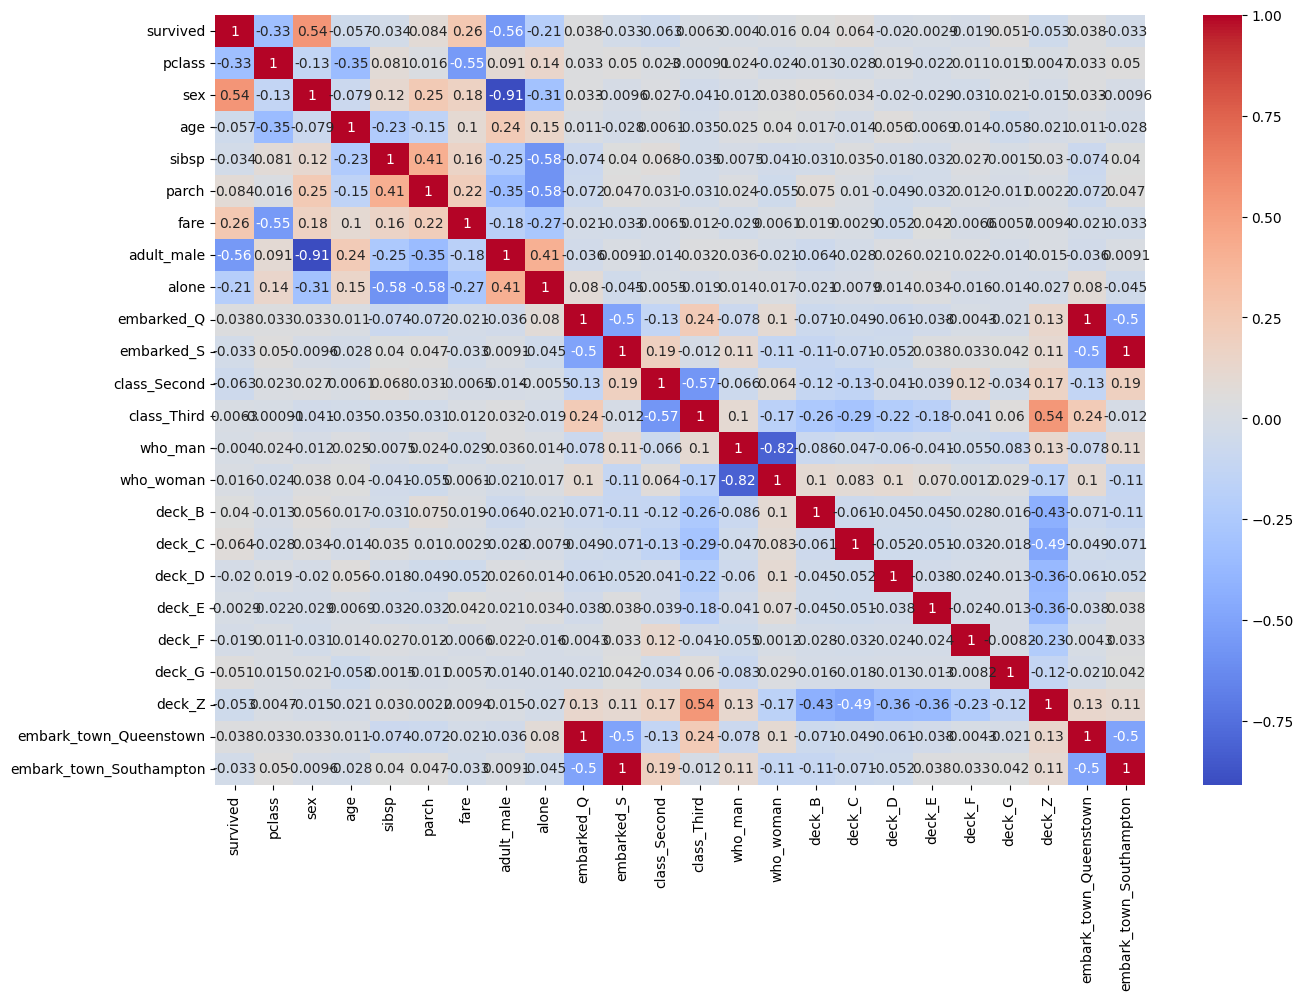

In [202]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [203]:
X = data.drop(columns=['survived'])
y = data['survived']

In [204]:
X.shape, y.shape

((887, 23), (887,))

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [212]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=7,shuffle=True,random_state=42)

models = {
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'SVC':SVC(),
    'KNN':KNeighborsClassifier()
}

In [213]:
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')
    results[name] = cv_results
    print(f"{name}: {cv_results} | Mean: {np.mean(cv_results):.7f}")

d:\clg_DS_Python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\clg_DS_Python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

Logistic Regression: [0.75903614 0.8313253  0.79268293 0.84146341 0.7804878  0.87804878
 0.85365854] | Mean: 0.8195290
Decision Tree: [0.75903614 0.77108434 0.76829268 0.74390244 0.76829268 0.76829268
 0.74390244] | Mean: 0.7604005
Random Forest: [0.81927711 0.86746988 0.82926829 0.79268293 0.75609756 0.86585366
 0.80487805] | Mean: 0.8193611
SVC: [0.69879518 0.69879518 0.65853659 0.67073171 0.62195122 0.67073171
 0.64634146] | Mean: 0.6665547
KNN: [0.72289157 0.77108434 0.68292683 0.6097561  0.70731707 0.76829268
 0.69512195] | Mean: 0.7081986


In [211]:
def get_model_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    print("-----"*10)
    print(f"Train Score: {model.score(X_train,y_train):.4f}")
    print(f"Test Score: {model.score(X_test,y_test):.4f}")

get_model_score(LogisticRegression(),X_train,y_train,X_test,y_test)
get_model_score(RandomForestClassifier(),X_train,y_train,X_test,y_test)

d:\clg_DS_Python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------
Train Score: 0.8212
Test Score: 0.8039
--------------------------------------------------
Train Score: 1.0000
Test Score: 0.7749


In [223]:
param_grid = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs', 'saga']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['sqrt', 'log2']
        }
    }
}

In [224]:
from sklearn.model_selection import GridSearchCV
scores = []
best_models = {}

for model_name, mp in param_grid.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    scores.append({
        'Model': model_name,
        'Best Score (CV)': grid.best_score_,
        'Best Params': grid.best_params_
    })
    best_models[model_name] = grid.best_estimator_   # Save best tuned model

for model_name, best_param in best_models.items():
    print(f"{model_name}: {best_param}")
    print("---"*15)

LogisticRegression: LogisticRegression(C=1, max_iter=1000, random_state=42)
---------------------------------------------
RandomForest: RandomForestClassifier(max_depth=10, random_state=42)
---------------------------------------------


In [228]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
models = {
    "RandomForest": RandomForestClassifier(max_depth=10, random_state=42),
    "LogisticRegression": LogisticRegression(C=1, max_iter=1000, random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-----" * 10)

Model: RandomForest
Accuracy: 0.8071
Confusion Matrix:
[[162  23]
 [ 37  89]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       185
         1.0       0.79      0.71      0.75       126

    accuracy                           0.81       311
   macro avg       0.80      0.79      0.80       311
weighted avg       0.81      0.81      0.80       311

--------------------------------------------------
Model: LogisticRegression
Accuracy: 0.8039
Confusion Matrix:
[[150  35]
 [ 26 100]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       185
         1.0       0.74      0.79      0.77       126

    accuracy                           0.80       311
   macro avg       0.80      0.80      0.80       311
weighted avg       0.81      0.80      0.80       311

--------------------------------------------------


In [226]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'deck_Z', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')